#Cerinta 1

In [9]:
import pandas as pd
import seaborn as sns

# Cerinta 1
data = pd.read_csv('./train.csv')
data_types = data.info()
print(data_types)
missing_values = data.isnull().sum()
print(missing_values)
has_duplicates = data.duplicated().sum()
print("Numarul duplicatelor este: ", has_duplicates)
num_rows = len(data)
print("Numarul total de linii este: ", num_rows)
num_columns = len(data.columns)
print("Numarul de coloane cu date este: ", num_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

#Cerinta 2

Procentul de supraviețuire:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Distribuția pe clase:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Distribuția pe sexe:
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


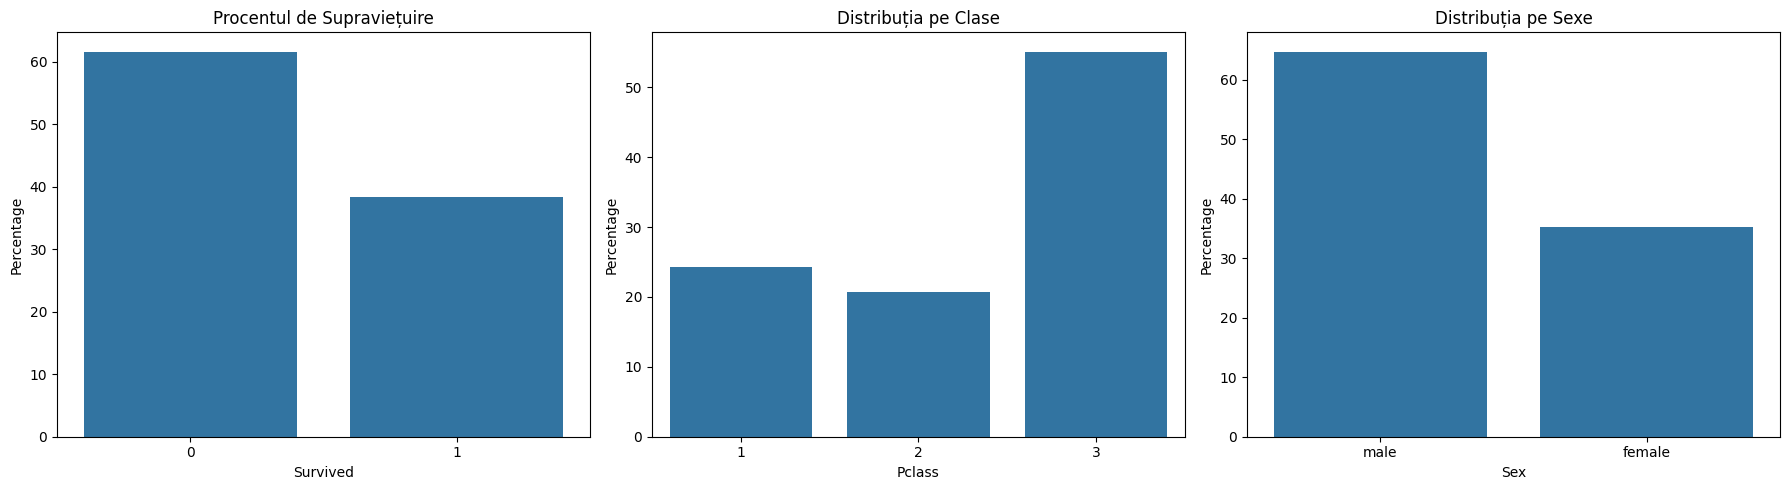

In [23]:
# Procentul persoanelor care au supraviețuit și care nu au supraviețuit
survival_rate = data['Survived'].value_counts(normalize=True) * 100
print(f'Procentul de supraviețuire:\n{survival_rate}')

# Procentul pasagerilor pentru fiecare tip de clasă
class_distribution = data['Pclass'].value_counts(normalize=True) * 100
print(f'Distribuția pe clase:\n{class_distribution}')

# Procentul bărbaților și femeilor
gender_distribution = data['Sex'].value_counts(normalize=True) * 100
print(f'Distribuția pe sexe:\n{gender_distribution}')

# Vizualizarea rezultatelor
import matplotlib.pyplot as plt
import seaborn as sns

# Grafice pentru supraviețuire, clasă și sex
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=survival_rate.index, y=survival_rate.values, ax=axes[0])
axes[0].set_title('Procentul de Supraviețuire')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Percentage')

sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=axes[1])
axes[1].set_title('Distribuția pe Clase')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Percentage')

sns.barplot(x=gender_distribution.index, y=gender_distribution.values, ax=axes[2])
axes[2].set_title('Distribuția pe Sexe')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

#Cerinta 3

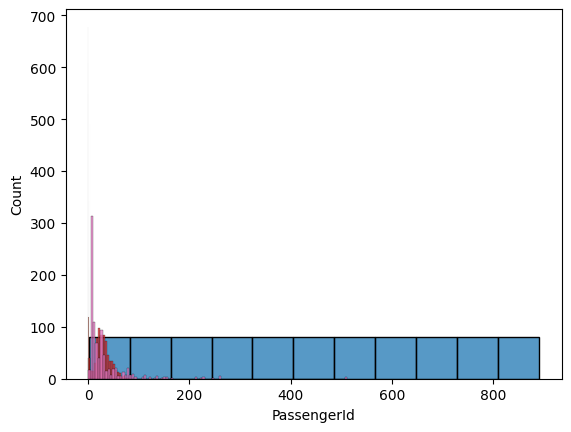

In [20]:
numeric_columns = data.select_dtypes(include='number').columns
for column in numeric_columns:
	sns.histplot(data=data, x=column)

#Cerinta 4

In [36]:
missing_columns = data.columns[data.isnull().any()]

# Determinarea numărului și proporției valorilor lipsă
missing_data = data[missing_columns].isnull().sum()
missing_percentage = (missing_data / num_rows) * 100
print(pd.DataFrame({'Numărul și proporția valorilor lipsă: ': missing_data, 'Procentaj: ': missing_percentage}))

# Procentul valorilor lipsă pentru fiecare clasă (Survived)
missing_by_survival = data.groupby('Survived')[missing_columns].apply(lambda x: x.isnull().sum() / len(x) * 100)
print(f'\nProcentul valorilor lipsă pe clase:\n{missing_by_survival}')

              Numărul și proporția valorilor lipsă:   Procentaj: 
Age                                              177    19.865320
Cabin                                            687    77.104377
Embarked                                           2     0.224467
Age Category                                     177    19.865320

Procentul valorilor lipsă pe clase:
                Age      Cabin  Embarked  Age Category
Survived                                              
0         22.768670  87.613843  0.000000     22.768670
1         15.204678  60.233918  0.584795     15.204678


#Cerinta 5

Numărul de pasageri pe categorii de vârstă:
Age Category
[21, 40]     385
[0, 20]      179
[41, 60]     128
[61, max]     22
Name: count, dtype: int64


<Axes: xlabel='Age Category'>

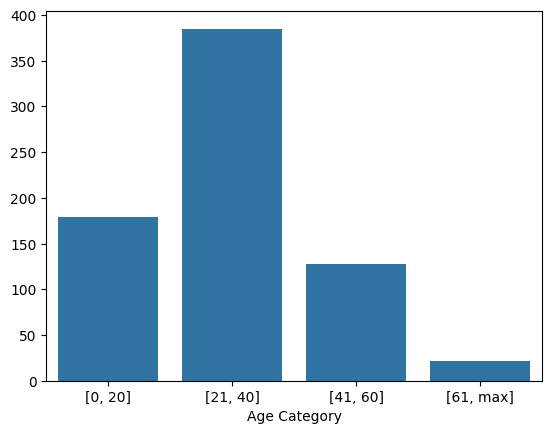

In [31]:
age_categories = pd.cut(data['Age'], bins=[0, 20, 40, 60, data['Age'].max()], labels=['[0, 20]', '[21, 40]', '[41, 60]', '[61, max]'])
data['Age Category'] = age_categories
passengers_per_category = data['Age Category'].value_counts()
print(f'Numărul de pasageri pe categorii de vârstă:\n{passengers_per_category}')
sns.barplot(x=passengers_per_category.index, y=passengers_per_category.values)

#Cerinta 6

Numărul de bărbați care au supraviețuit în fiecare categorie de vârstă:
Age Category
[0, 20]      29
[21, 40]     46
[41, 60]     16
[61, max]     2
Name: Survived, dtype: int64


/var/folders/qm/qw7v05t91gbc3d_lfk2d2svh0000gn/T/ipykernel_37877/2951656393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_survival_by_age_category = data[data['Sex'] == 'male'].groupby('Age Category')['Survived'].sum()


<Axes: xlabel='Age Category'>

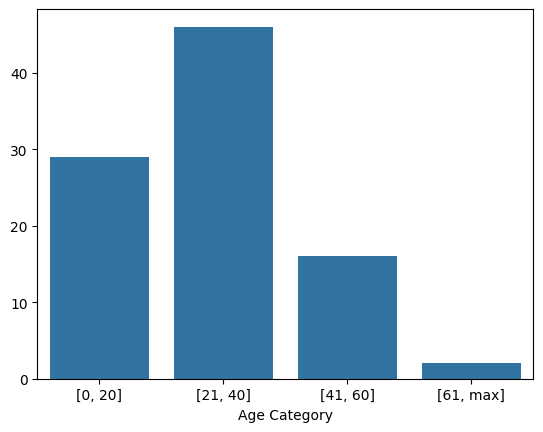

In [42]:
male_survival_by_age_category = data[data['Sex'] == 'male'].groupby('Age Category')['Survived'].sum()
print(f'Numărul de bărbați care au supraviețuit în fiecare categorie de vârstă:\n{male_survival_by_age_category}')
# male_survival_by_age_category = data[data['Sex'] == 'male'].groupby('Age Category')['Survived'].mean() * 100
sns.barplot(x=male_survival_by_age_category.index, y=male_survival_by_age_category.values)

#Cerinta 7

Procentul de copii: 12.68%


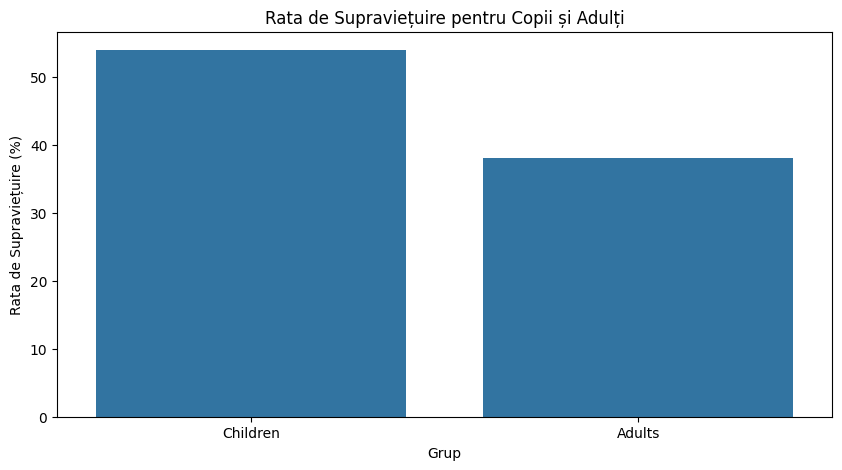

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./train.csv')
num_rows = len(data)
children_number = data[data['Age'] < 18]
children_survival_rate = len(children_number) / num_rows * 100
print(f"Procentul de copii: {children_survival_rate:.2f}%")
children_survival_rate = data[data['Age'] < 18]['Survived'].mean() * 100
adults_survival_rate = data[data['Age'] >= 18]['Survived'].mean() * 100
plt.figure(figsize=(10, 5))
# sns.barplot(x=gr, y=survival_rates)
sns.barplot(x=['Children', 'Adults'], y=[children_survival_rate, adults_survival_rate])

# Adăugarea titlului și etichetelor
plt.title('Rata de Supraviețuire pentru Copii și Adulți')
plt.xlabel('Grup')
plt.ylabel('Rata de Supraviețuire (%)')

# Afișarea graficului
plt.show()

#Cerinta 8

#Cerinta 9

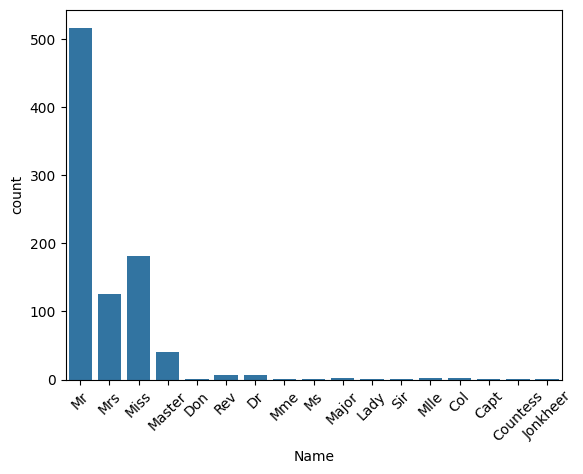

In [57]:
titles = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_gender_match = pd.crosstab(titles, data['Sex'])
sns.countplot(x=titles)
plt.xticks(rotation=45)
plt.show()

#Cerinta 10

/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


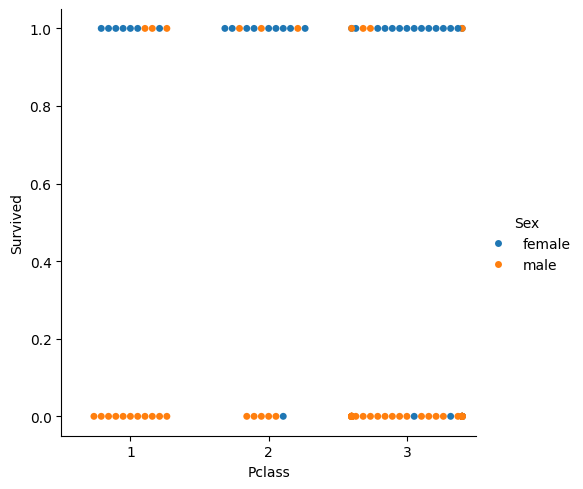

In [63]:
subset = data.head(100)
sns.catplot(data=subset, x='Pclass', y='Survived', hue='Sex', kind='swarm')